In [1]:
import numpy as np
import cv2 # OpenCV biblioteka
import matplotlib
import matplotlib.pyplot as plt
import pylab
import imageio as img

In [2]:
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 
# prikaz vecih slika
matplotlib.rcParams['figure.figsize'] = 16,12
kernel = np.ones((3, 3))

Y centar:
275
X centar:
350


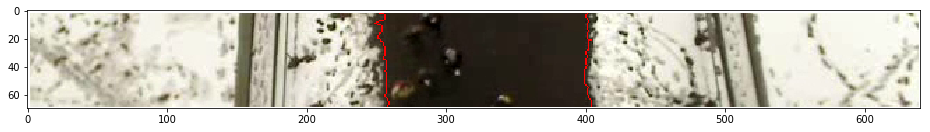

In [29]:
filename = 'videos/video10.mp4'
vid = img.get_reader(filename,  'ffmpeg')

for i in range(225,226):
    image = vid.get_data(i)
    
    #plt.imshow(image);
    #plt.show()
    
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    image_invert = 255-image_gray
    #image_bin = image_gray > 60
    
    #ADAPTIVE THRESHOLD
    ret, image_bin = cv2.threshold(image_invert, 200, 255, cv2.THRESH_BINARY)
    image_bin = cv2.erode(image_bin, kernel, iterations=1)
    #image_bin = cv2.dilate(image_bin, kernel, iterations=1)
    
    #fig = plt.figure()
    #fig.suptitle('FRAME #{}'.format(i), fontsize=20)
    #plt.imshow(image_bin, 'gray');
    #plt.show()
    
    
    
    ####### searching for contours
    slika, contours, hierarchy = cv2.findContours(image_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    contours_pedestrians = [] #ovde ce biti samo konture koje pripadaju bar-kodu
    for contour in contours: # za svaku konturu
        center, size, angle = cv2.minAreaRect(contour) # pronadji pravougaonik minimalne povrsine koji ce obuhvatiti celu konturu
        width, height = size
        if height > 50: # uslov da kontura pripada bar-kodu
            contours_pedestrians.append(contour) # ova kontura pripada bar-kodu
    
    
    slika = image.copy()
    cv2.drawContours(slika, contours_pedestrians, -1, (255, 0, 0), 1)
    
    
    # determine the most extreme points along the contour
    c = max(contours_pedestrians, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    cv2.circle(slika, extLeft, 8, (0, 0, 255), -1)
    cv2.circle(slika, extRight, 8, (0, 255, 0), -1)
    cv2.circle(slika, extTop, 8, (255, 0, 0), -1)
    cv2.circle(slika, extBot, 8, (255, 255, 0), -1)
    
    
    print("Y centar:") #y
    center_y = int(((extBot[1]-extTop[1])/2)+extTop[1])
    print(center_y)
    
    print("X centar:") #y
    center_x = int(((extRight[0]-extLeft[0])/2)+extLeft[0])
    print(center_x)
    
    
    #draw central point inside plato contour
    #cv2.circle(slika, (center_x, center_y), 8, (255, 255, 255), -1)
    
    #rectangle inside scene which is our designated area of observation
    cv2.rectangle(slika, (0, center_y-35), (640, center_y+35), (255, 255, 255), 2)
    io = slika[center_y-35:center_y+35, :]
    
    plt.imshow(io)
    #######
    
    

#     slika_konturisana = image.copy()
#     cv2.drawContours(slika_konturisana, contours_pedestrians, -1, (0, 255, 0), 1)
#     plt.imshow(slika_konturisana)
    
